<a href="https://colab.research.google.com/github/tutruongmaster/Computer_Vision/blob/main/Morphological.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Họ và Tên: <b>Nguyễn Trung Trí</b> <br>
MSSV: 19000131<br>
Lớp: CHKHMT9A<br>
<center><b>Tên đề tài:</b> <br><b><div style="color:#00C; font-size:24px">Morphological Transformations (Biến đổi hình thái)</div></b></center><br>
<b>Mục tiêu:</b><br>
<ul>
    <li>Chúng ta sẽ nghiên cứu cách hoạt động của các Morphological khác nhau như: Erosion, Dilation, Opening, Closing,..
    </li>
    <li> Chúng ta sẽ nghiên cứu các chức năng khác nhau như: <b>cv2.erode(), cv2.dilate(), cv2.morphologyEx()</b>
    </li>
    
</ul><br>
<b>Lý thuyết:</b><br>
<div align="justify">Phép biến đổi hình thái là một số thao tác đơn giản dựa trên hình dạng của hình ảnh. Nó thường được thực hiện trên hình ảnh nhị phân. Nó cần hai đầu vào, một là hình ảnh gốc của chúng ta, thứ hai được gọi là <b>phần tử cấu trúc (structuring element)</b> hoặc <b>hạt nhân (kernel)</b> quyết định bản chất của hoạt động. Hai toán tử hình thái cơ bản là xói mòn (Erosion) và giãn nở (Dilation). Sau đó, các dạng biến thể của nó như Opening, Closing, Gradient, v.v. cũng phát huy tác dụng. Chúng ta sẽ lần lượt nghiên cứu với sự trợ giúp của hình ảnh sau:</div><br>


<div align="center">

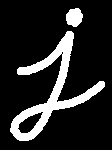

</div>

<br><b>1. Erosion<br></b>
<div align="justify">
Ý tưởng cơ bản của Erosion chỉ giống như xói mòn đất, nó làm xói mòn biên của đối tượng. Cách thức hoạt động: Kernel trượt qua hình ảnh (như trong tích chập 2D). Một pixel trong ảnh gốc (1 hoặc 0) sẽ chỉ được coi là 1 nếu tất cả các pixel trong kenel là 1, nếu không nó sẽ bị xói mòn (chuyển thành 0).
<div align="center">

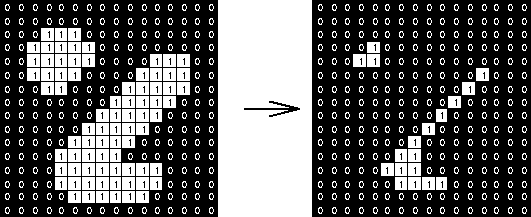
</div>
<br>
Và điều gì đã xảy ra là, tất cả các pixel gần ranh giới sẽ bị loại bỏ tùy thuộc vào kích thước của Kernel. Vì vậy, độ dày hoặc kích thước của đối tượng giảm hoặc đơn giản là giảm vùng trắng trong ảnh. Nó hữu ích để loại bỏ các nhiễu nhỏ màu trắng, tách hai đối tượng được kết nối, v.v.
<br><br>
Ở đây, làm ví dụ, tôi sẽ sử dụng Kernel 5x5 với đầy đủ các nhân. Hãy xem nó hoạt động như thế nào:
<div>

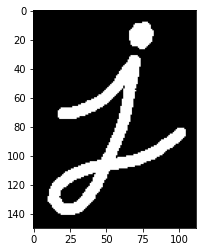

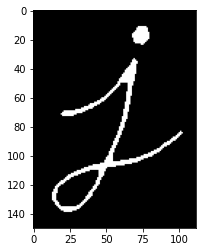

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/My Drive/ColabNotebooks/Morphological/j.png',0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
kernel = np.ones((5,5),np.uint8) # tạo mảng 2 chiều 5x5
erosion = cv2.erode(img,kernel,iterations = 1) # số lần lập lại erosion = 1

plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.show()

<b>2. Dilation<br></b>
<div align="justify">
Nó chỉ ngược lại với xói mòn. Ở đây, một phần tử pixel là ‘1’ nếu ít nhất một pixel bên dưới kernel là ‘1’. Vì vậy, nó làm tăng vùng trắng trong hình ảnh hoặc kích thước của đối tượng tăng lên. Thông thường, trong các trường hợp như loại bỏ nhiễu, xói mòn tiếp theo là sự giãn nở. Bởi vì, xói mòn loại bỏ nhiễu trắng, nhưng nó cũng thu nhỏ vật thể của chúng ta. Vì vậy, chúng ta làm giãn nó. Vì nhiễu biến mất, chúng sẽ không quay trở lại, nhưng diện tích đối tượng của chúng ta sẽ tăng lên. Nó cũng hữu ích trong việc nối các phần bị hỏng của một đối tượng.
</div>
<div align="center">

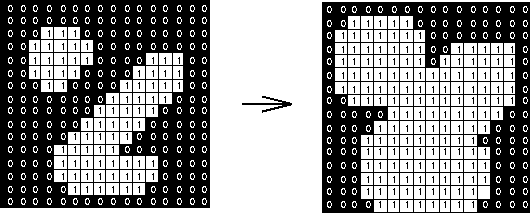

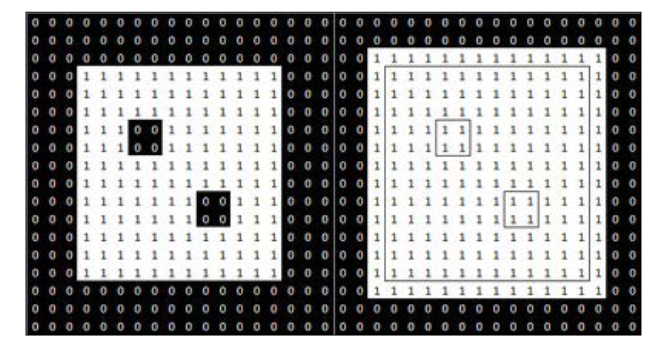
</div>

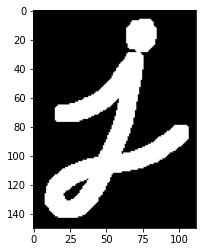

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
plt.show()

<b>3. Opening<br></b>
<div align="justify">
Mở cửa chỉ là một tên gọi khác của Erosion sau đó là Dilation. Nó rất hữu ích trong việc loại bỏ nhiễu. Ở đây chúng ta sử dụng hàm, <b>cv2.morphologyEx()</b>
</div>

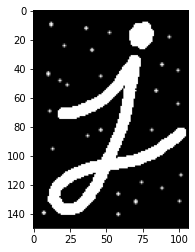

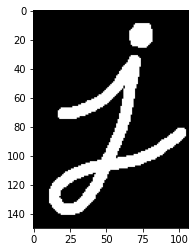

In [ ]:
imgopening = cv2.imread('/content/drive/My Drive/ColabNotebooks/Morphological/opening.png',0)
plt.imshow(cv2.cvtColor(imgopening, cv2.COLOR_BGR2RGB))
plt.show()
opening = cv2.morphologyEx(imgopening, cv2.MORPH_OPEN, kernel)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()

<b>4. Closing<br></b>
<div align="justify">
Đóng cửa ngược lại với Opening, Dilation sau đó là Erosion. Nó rất hữu ích trong việc đóng các lỗ nhỏ bên trong các đối tượng, hoặc các điểm đen nhỏ trên đối tượng.
</div>

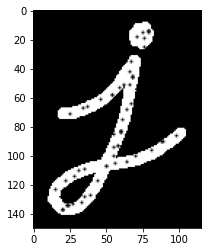

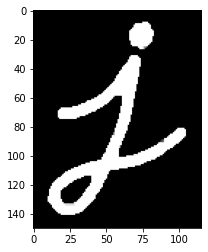

In [ ]:
imgclosing = cv2.imread('/content/drive/My Drive/ColabNotebooks/Morphological/closing.png',0)
plt.imshow(cv2.cvtColor(imgclosing, cv2.COLOR_BGR2RGB))
plt.show()
closing = cv2.morphologyEx(imgclosing, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.show()

<b>5. Morphological Gradient<br></b>
<div align="justify">
Đó là phép trừ giữa sự Dilation và Erosion của một hình ảnh.

Kết quả sẽ giống như đường viền của đối tượng.
</div>

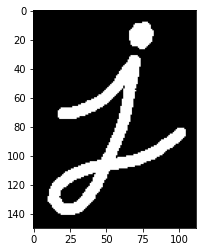

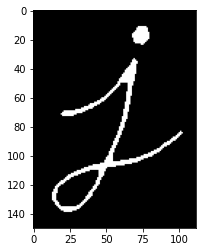

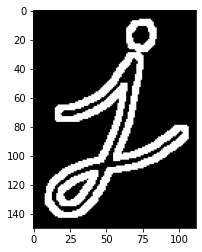

In [ ]:
img = cv2.imread('/content/drive/My Drive/ColabNotebooks/Morphological/j.png',0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
kernel = np.ones((5,5),np.uint8) # tạo mảng 2 chiều 5x5
erosion = cv2.erode(img,kernel,iterations = 1) # số lần lập lại erosion = 1
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.show()

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
plt.show()

<b>6. Top Hat<br></b>
<div align="justify">
Đó là phép trừ giữa hình ảnh đầu vào và hình ảnh Opening. Ví dụ dưới đây được thực hiện cho nhân 9x9.
</div>

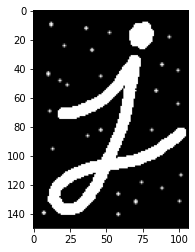

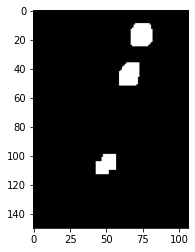

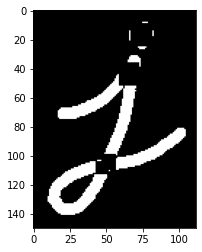

In [ ]:
kerneltophat = np.ones((9,9),np.uint8) # tạo mảng 2 chiều 9x9

imgopening = cv2.imread('/content/drive/My Drive/ColabNotebooks/Morphological/opening.png',0)
plt.imshow(cv2.cvtColor(imgopening, cv2.COLOR_BGR2RGB))
plt.show()
opening = cv2.morphologyEx(imgopening, cv2.MORPH_OPEN, kerneltophat)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.show()


tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kerneltophat)
plt.imshow(cv2.cvtColor(tophat, cv2.COLOR_BGR2RGB))
plt.show()

<b>7. Black Hat<br></b>
<div align="justify">
Đó là phép trừ giữa hình ảnh đầu vào và hình ảnh Closing. 
</div>

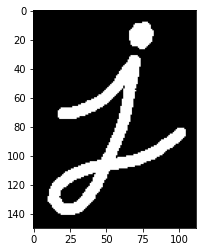

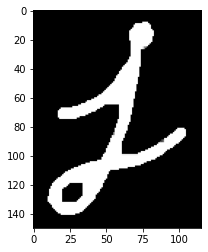

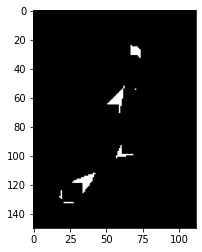

In [ ]:
imgclosing = cv2.imread('/content/drive/My Drive/ColabNotebooks/Morphological/closing.png',0)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
closing = cv2.morphologyEx(imgclosing, cv2.MORPH_CLOSE, kerneltophat)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.show()
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kerneltophat)
plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB))
plt.show()

<b>Structuring Element<br></b>
<div align="justify">
Chúng tôi đã tạo thủ công các phần tử có cấu trúc trong các ví dụ trước với sự trợ giúp của Numpy. Nó có dạng hình vuông. Nhưng trong một số trường hợp, bạn có thể cần nhân hình elip / hình tròn. Vì vậy, cho mục đích này, OpenCV có một hàm, <b>cv2.getStructuringElement()</b>. Bạn chỉ cần vượt qua hình dạng và kích thước của hạt nhân, bạn sẽ có được hạt nhân mong muốn.
</div>
<div align="center">

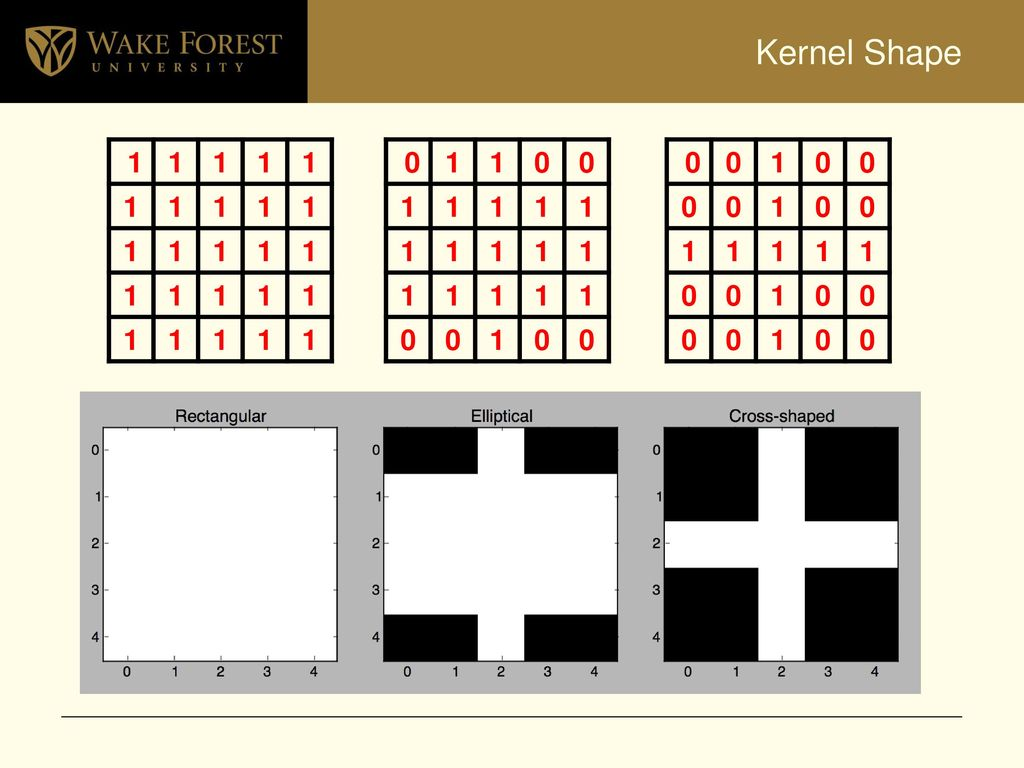

</div>

Ảnh gốc:


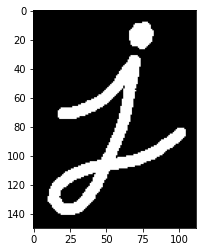

Rectangular Kernel:


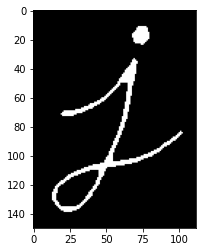

Elliptical Kernel:


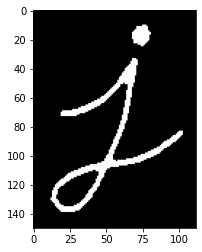

Cross-shaped Kernel:


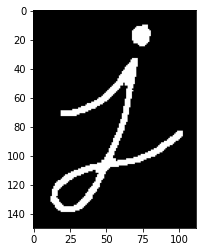

In [ ]:
print("Ảnh gốc:")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
# Rectangular Kernel
print("Rectangular Kernel:")
MORPH = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
erosionRec = cv2.erode(img,MORPH,iterations = 1)
plt.imshow(cv2.cvtColor(erosionRec, cv2.COLOR_BGR2RGB))
plt.show()

# Elliptical Kernel
print("Elliptical Kernel:")
MORPH = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
erosionEll = cv2.erode(img,MORPH,iterations = 1)
plt.imshow(cv2.cvtColor(erosionEll, cv2.COLOR_BGR2RGB))
plt.show()

# Cross-shaped Kernel
print("Cross-shaped Kernel:")
MORPH = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
erosionCros = cv2.erode(img,MORPH,iterations = 1)
plt.imshow(cv2.cvtColor(erosionCros, cv2.COLOR_BGR2RGB))
plt.show()
